https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html


https://onlinecourses.science.psu.edu/stat505/lesson/11

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

## PCA Vs. LDA

Both Linear Discriminant Analysis (LDA) and PCA are linear transformation methods. PCA yields the directions (principal components) that maximize the variance of the data, whereas LDA also aims to find the directions that maximize the separation (or discrimination) between different classes, which can be useful in pattern classification problem (PCA “ignores” class labels). 
##### In other words, PCA projects the entire dataset onto a different feature (sub)space, and LDA tries to determine a suitable feature (sub)space in order to distinguish between patterns that belong to different classes.

### A Summary of the PCA Approach

1. Standardize the data.
2. Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Value Decomposition.
3. Sort eigenvalues in descending order and choose the k eigenvectors that correspond to the k largest eigenvalues where k is the number of dimensions of the new feature subspace (k≤d).
4. Construct the projection matrix W from the selected k eigenvectors.
5. Transform the original dataset X via W to obtain a k-dimensional feature subspace Y.

### Preparing the Iris Dataset



About Iris

For the following tutorial, we will be working with the famous “Iris” dataset that has been deposited on the UCI machine learning repository 
(https://archive.ics.uci.edu/ml/datasets/Iris).

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset are:

Iris-setosa (n=50)

Iris-versicolor (n=50)

Iris-virginica (n=50)

And the four features of in Iris dataset are:

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm

In [60]:
# Read data

import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
data.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
data.tail()


,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [61]:
## split data
X=data.iloc[:,0:4]
y = data.iloc[:,4]

In [62]:
## store data as matrix
X=X.values
y=y.values

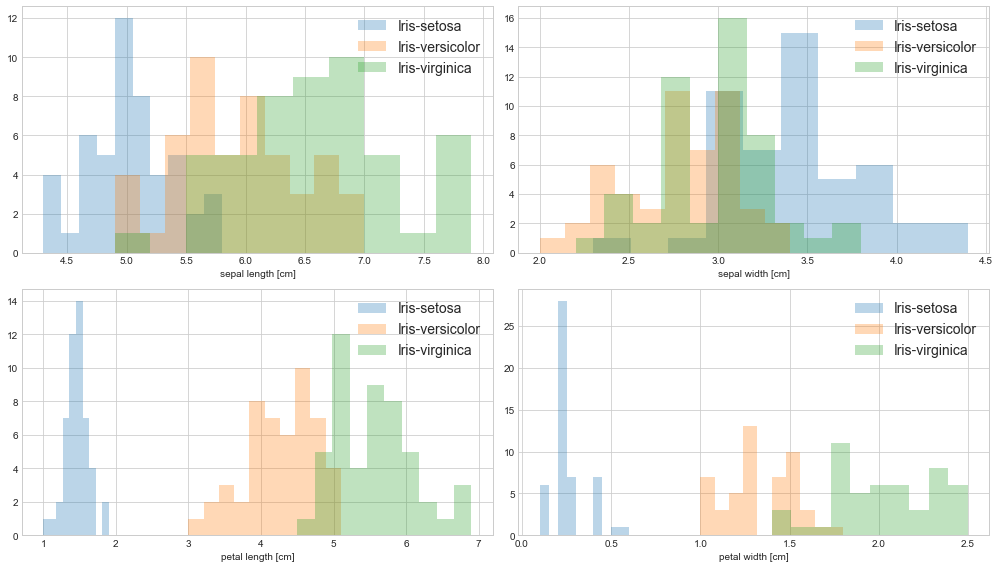

In [63]:
## Distribution of features for three classes

import matplotlib.pyplot as plt
import numpy as np
import math

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(14, 8))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
        plt.legend(loc='upper right', fancybox=True, fontsize=14)

    plt.tight_layout()
    plt.show()

In [64]:
## Standardization

from sklearn.preprocessing import StandardScaler
standardX = StandardScaler().fit_transform(X)


## 1 - Eigendecomposition 

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

In [65]:
# Covariance matrix calculation
# Transpose(X-xmean)*(X-xmean)/(n-1)
import numpy as np

xmean = np.mean(standardX,axis=0)
covariancematrix= ((standardX-xmean).T.dot(standardX-xmean))/(standardX.shape[0]-1)
covariancematrix


array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [66]:
# or inbuilt function for covariance matrix
np.cov(standardX.T)

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [67]:
#eigenvalue and eigenvector of covariance matrix
eigenvals, eigenvecs = np.linalg.eig(covariancematrix)
eigenvecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [68]:
#eigenvalue and eigenvector of correlation matrix
cor_mat1 = np.corrcoef(standardX.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)
eig_vecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

All three approaches yield the same eigenvectors and eigenvalue pairs:

1. Eigendecomposition of the covariance matrix after standardizing the data.
2. Eigendecomposition of the correlation matrix.
3. Eigendecomposition of the correlation matrix after standardizing the data.

Singular Value Decomposition

While the eigendecomposition of the covariance or correlation matrix may be more intuitiuve, most PCA implementations perform a Singular Value Decomposition (SVD) to improve the computational efficiency. So, let us perform an SVD to confirm that the result are indeed the same:

In [69]:
u,s,v = np.linalg.svd(standardX.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [70]:
#Create tuples of eigenpairs

eigenpairs = [(eig_vals[i],eig_vecs[:,i]) for i in range(len(eig_vals))]
eigenpairs.sort(key=lambda x: x[0], reverse=True)
#eigenpairs


After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [71]:
total_eigval = sum(eig_vals)

var_eigval = [i/total_eigval for i in sorted(eig_vals, reverse=True)]
cumsum_var_eigval = np.cumsum(var_eigval)


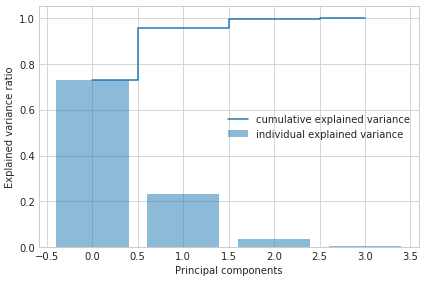

In [72]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_eigval, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cumsum_var_eigval, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [73]:
# create a matrix of top two eigenvector as it explains most of variability in data

matrix_w = np.hstack((eigenpairs[0][1].reshape(4,1),
                      eigenpairs[1][1].reshape(4,1)))


In this last step we will use the 4×2-dimensional projection matrix W to transform our samples onto the new subspace 

In [74]:
Y = standardX.dot(matrix_w)

In [79]:
Y

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

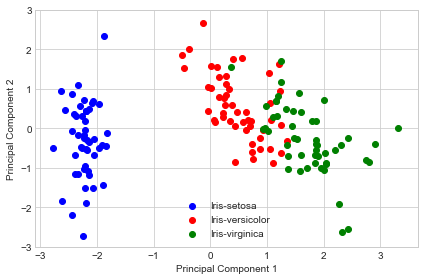

In [75]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

### Shortcut - PCA in scikit-learn
For educational purposes, we went a long way to apply the PCA to the Iris dataset. But luckily, there is already implementation in scikit-learn.

In [92]:
from sklearn.decomposition import PCA as pca
Y_sklearn = pca(n_components=2, svd_solver='arpack').fit_transform(standardX)



In [93]:
Y_sklearn

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

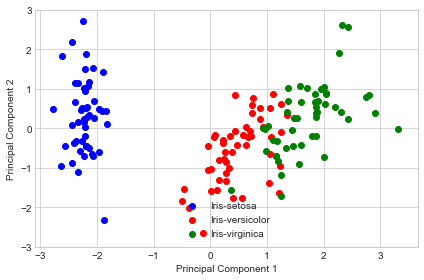

In [91]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()


In [88]:
#Notice sklearn pca has flipped the sign 